In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import TweetTokenizer
from proce import TextPreprocessor


# Cargar los datos en un DataFrame de pandas
movies_df = pd.read_csv('./data/MovieReviews.csv', sep=',')

# Función para tokenizar los tweets
nltk.download('punkt')
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

# Descargando las stopwords
nltk.download('stopwords')
stop_words_complete = list(stopwords.words('spanish')) + list(stopwords.words('english'))


# Crear el pipeline
text_pipeline = Pipeline([
    ('preprocessing', TextPreprocessor() ),
    ('vectorizer', CountVectorizer(tokenizer=tokenizer, stop_words=stop_words_complete, lowercase=True)),
    ('classifier', RandomForestClassifier(random_state=2))
])


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(movies_df['review_es'], movies_df['sentimiento'], test_size=0.2, random_state=42)

# Ajustar el pipeline a los datos de entrenamiento
text_pipeline.fit(X_train, y_train)

# Evaluar el pipeline en los datos de prueba
score = text_pipeline.score(X_test, y_test)
print("Accuracy:", score)


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import TweetTokenizer
from procesador2 import TextPreprocessor
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
import enchant
broker = enchant.Broker()
broker.describe()
broker.list_languages()


In [23]:

# Cargar los datos en un DataFrame de pandas
movies_df = pd.read_csv('./data/MovieReviews.csv', sep=',', encoding="utf-8", index_col=0)


# Función para tokenizar los tweets
nltk.download('punkt')
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

# Descargando las stopwords
nltk.download('stopwords')
stop_words_complete = list(stopwords.words('spanish')) + list(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:

# Crear el pipeline
text_pipeline = Pipeline([
    ('preprocessing', TextPreprocessor() ),
    ('vectorizer', CountVectorizer(tokenizer=tokenizer, stop_words=stop_words_complete, lowercase=True)),
    ('classifier', RandomForestClassifier(random_state=2, n_estimators=200, min_samples_split=3, max_depth=5, criterion='gini'))
])


Reviews initialized


In [25]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(movies_df['review_es'], movies_df['sentimiento'], test_size=0.2, random_state=42)

In [26]:
# Ajustar el pipeline a los datos de entrenamiento
text_pipeline.fit(X_train, y_train)



Fitting reviews...
Transforming reviews...
Preprocessing text...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Finished preprocessing text...


c:\Users\Esteban\Documents\proyectos-semestre-septimo\inteligencia_negocios\app-analisis-sentimientos-pelicula\env\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('preprocessing', TextPreprocessor()),
                ('vectorizer',
                 CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function tokenizer at 0x0000016928C8C720>)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, min_samples_split=3,
                                        n_estimators=200, random_state=2))])

In [28]:
# Generación de predicciones para entrenamiento y test para el cálculo de errores
preds_train = text_pipeline.predict(X_train)
preds_test = text_pipeline.predict(X_test)

Transforming reviews...
Preprocessing text...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Finished preprocessing text...
Transforming reviews...
Preprocessing text...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Esteban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Finished preprocessing text...


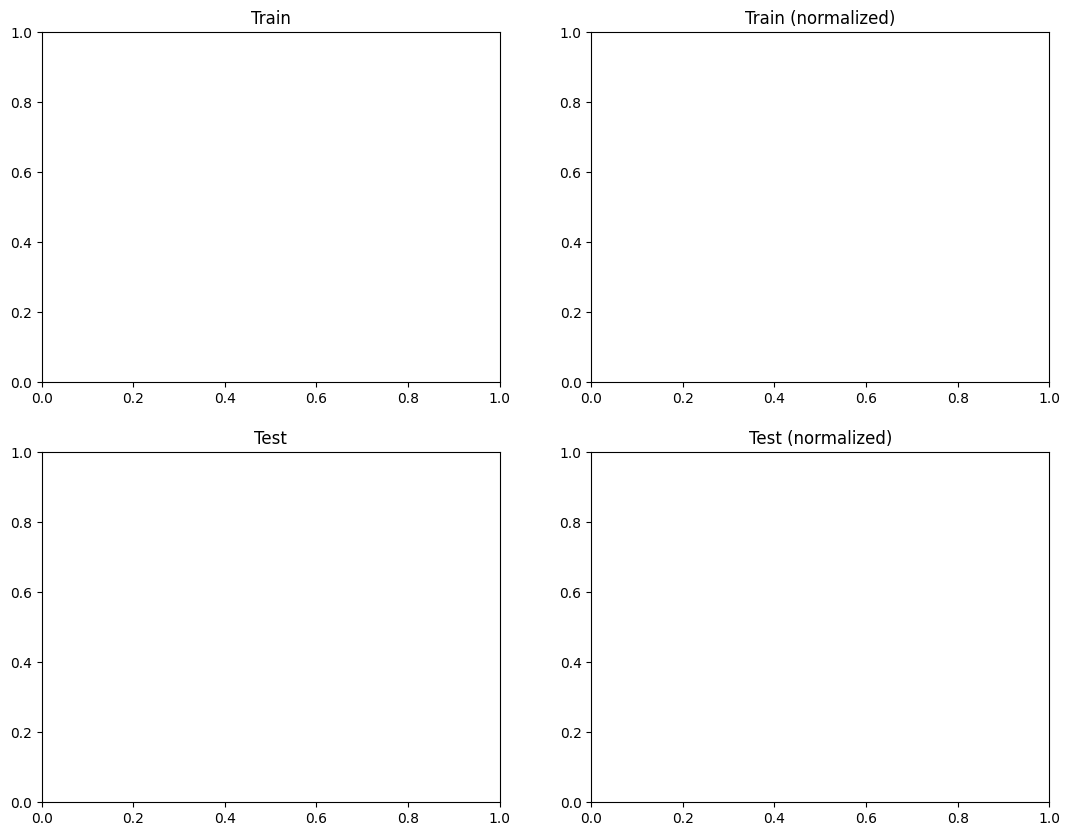

In [33]:

cm_train = confusion_matrix(y_train, preds_train)
cm_train_norm = confusion_matrix(y_train, preds_train, normalize = 'true')
cm_test = confusion_matrix(y_test, preds_test)
cm_test_norm = confusion_matrix(y_test, preds_test, normalize = 'true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13, 10))
ConfusionMatrixDisplay(confusion_matrix = cm_train)
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm)
ConfusionMatrixDisplay(confusion_matrix = cm_test)
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm)

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

In [34]:
pd.DataFrame([
    {
        'Train': precision_score(y_train, preds_train, pos_label = 'positivo'),
        'Test': precision_score(y_test, preds_test, pos_label = 'positivo')
    },
    {
        'Train':recall_score(y_train, preds_train, pos_label = 'positivo'),
        'Test': recall_score(y_test, preds_test, pos_label = 'positivo')
    },
    {
        'Train': f1_score(y_train, preds_train, pos_label = 'positivo'),
        'Test': f1_score(y_test, preds_test, pos_label = 'positivo')
    }
], index = ['Precision', 'Recall', 'F1'])

,Train,Test
Precision,0.831060,0.745000
Recall,0.944500,0.894000
F1,0.884156,0.812727
